# 生成数据

## 绘制简单折线图

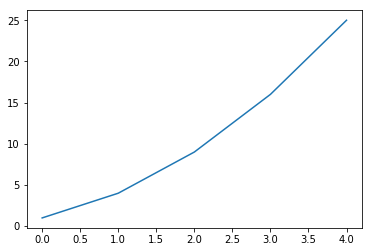

In [6]:
%matplotlib inline
# 以上命令让软件在这里画图
import matplotlib.pyplot as plt

squares = [1, 4, 9, 16, 25] # 尝试将数字变成有意义的图形
plt.plot(squares)

### 修改文字标签和线条粗细

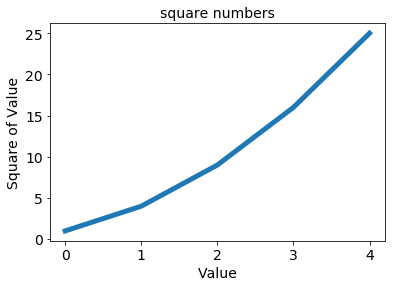

In [10]:
import matplotlib.pyplot as plt # pyplot 包含许多生成图表的函数


squares = [1,4,9,16,25] # 不指定坐标时，第一个数字对应0

plt.plot(squares, linewidth=5) # 尝试根据数字绘制有意义的图形 
# 不给初始值,假设为0

# 设置图表标题，并给坐标轴加上标签
plt.title('square numbers',fontsize=14)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14) # xlabel,ylabel 决定线条的粗细

# 设置刻度标记的大小
plt.tick_params(axis='both',labelsize=14) # axis='both'指定实参影响x，y轴的刻度
                                           # 刻度标记字号为14

Text(0.5, 1.0, '$x^2$')

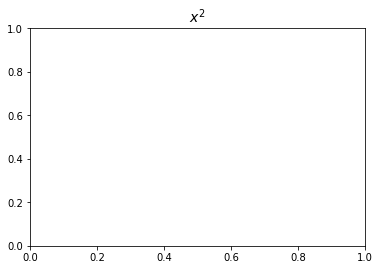

In [9]:
# 可以加两个$$使用latex公式
plt.title('$x^2$',fontsize=14)

### 矫正图形

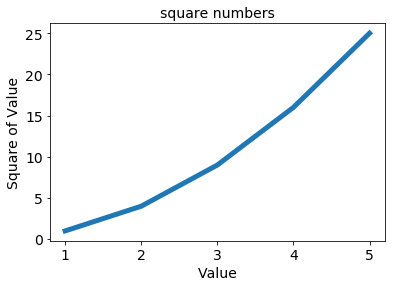

In [12]:
import matplotlib.pyplot as plt # pyplot 包含许多生成图表的函数

input_values = [1,2,3,4,5]
squares = [1,4,9,16,25] # 不指定坐标时，第一个数字对应0

plt.plot(input_values,squares, linewidth=5) # 尝试根据数字绘制有意义的图形

# 设置图表标题，并给坐标轴加上标签
plt.title('square numbers',fontsize=14)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14) # xlabel,ylabel 决定线条的粗细

# 设置刻度标记的大小
plt.tick_params(axis='both',labelsize=14) # axis='both'指定实参影响x，y轴的刻度
                                           # 刻度标记字号为14

plt.show() # 打开查看器，绘制图像

### 使用scatter()并设置样式

'\nplt.savvefig可以保存图表，第一个形参指定文件名\n第二个形参表示将空白区域裁掉\n'

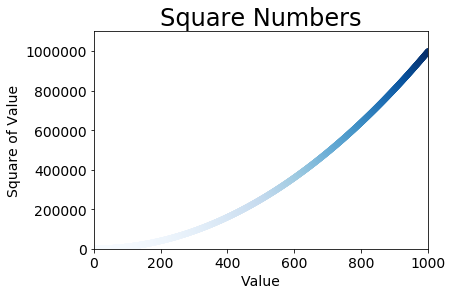

In [2]:
import matplotlib.pyplot as plt

x = list(range(1,1001))  # 创建1<= x <=1000 的列表
y = [x ** 2 for x in x]

plt.scatter(x,y,edgecolor='none',c=y,cmap=plt.cm.Blues,s=40) # 实参s设置了点的尺寸
'''
默认为蓝色点黑色轮廓，绘制很多点时，黑色轮廓黏在一起，
可传递实参edgecolor='none'
c可设置颜色名称，如c=‘red’也可自定义颜色，包含3个0~1的小数值
值接近0，颜色越深，淡蓝色为c=(0,0,0.8)

颜色映射（colormap）从起始颜色渐变到结束颜色
以上代码让数值小的表示浅蓝色，y值大为深蓝色
'''

# 设置图标并给坐标轴加标签
plt.title('Square Numbers',fontsize=24)
plt.xlabel('Value',fontsize=14)
plt.ylabel('Square of Value',fontsize=14)

# 设置刻度标记大小
plt.tick_params(axis='both',which='major',labelsize=14)

# 设置每个坐标轴的取值范围
plt.axis([0,1000,0,1100000])
'''
x轴范围是[0,1100]
y轴范围是[0,1100000]
'''
#plt.show()

plt.savefig('text_files/squares_plot.png',bbox_inches='tight')
'''
plt.savvefig可以保存图表，第一个形参指定文件名
第二个形参表示将空白区域裁掉
'''

## 随机漫步

### 创建RandomWalk()类

In [7]:
from random import choice
'''
将所有可能选择放到列表中,在决策时可以选择使用那种选择
Signature: choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      d:\anaconda\lib\random.py
Type:      method
'''

class RandomWalk():
    '''一个生成随机漫步数据的类'''
    
    def __init__(self, num_points=5000):# 将随机漫步初始值设为5000
        '''初始化自由漫步的属性'''
        self.num_points = num_points
        
        # 所有随机漫步始于(0,0)
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        '''计算随机漫步包含的的所有点'''
        
        # 不断漫步,直到列表达到指定长度
        while len(self.x_values) < self.num_points:
            # 决定前进方向及前进距离
            x_direction = choice([-1, 1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance

            y_direction = choice([-1,1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance

            # 拒绝原地踏步
            if x_step==0 and y_step == 0:
                continue

            # 计算下一个x,y值
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)


### 绘制随机漫步

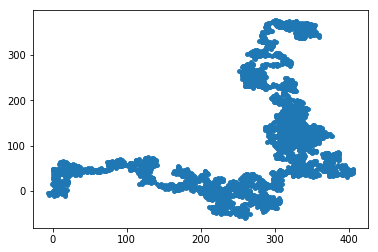

In [8]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()
plt.scatter(rw.x_values, rw.y_values,s=15)

### 给点着色

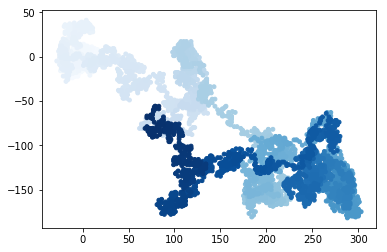

In [16]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()
############
point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
# plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
#            edgecolor='none',s=15)
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            s=15) # edgecolor='none'好像是默认的
#############

### 重新绘制起点终点

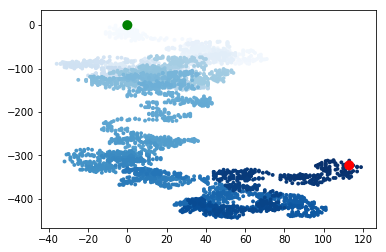

In [18]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()

point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)

##############
# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

### 隐藏坐标轴

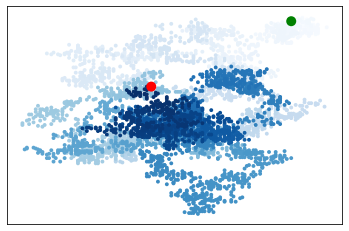

In [23]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()

point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)


# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

### 增加点数

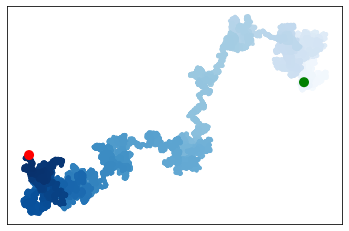

In [25]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入
###########
rw = RandomWalk(50000)
#########
rw.fill_walk()

point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)


# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

### 调整尺寸来适应屏幕

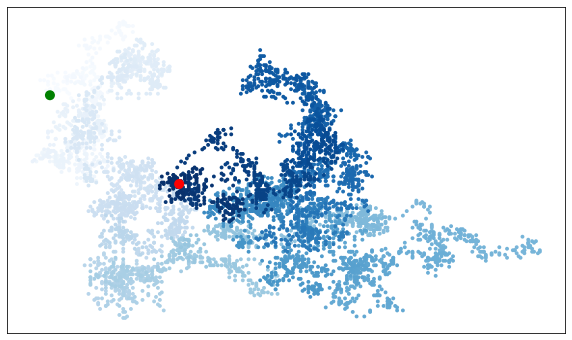

In [28]:
import matplotlib.pyplot as plt

# from random_walk import RandomWalk # 最好把上面的类放到一个文件里导入

rw = RandomWalk()
rw.fill_walk()
############
# 设置绘图窗口尺寸
plt.figure(figsize=(10, 6))
###############3
point_numbers = list(range(rw.num_points)) # 生成数字列表对应每个点
plt.scatter(rw.x_values, rw.y_values,c=point_numbers, cmap=plt.cm.Blues, 
            edgecolor='none',s=15)


# 突出起点终点
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',s=100)

# 隐藏坐标轴
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)

## 使用pygal模拟掷骰子
- [pygal官方文档](http://www.pygal.org/en/stable/)

### 创建Die类

In [7]:
from random import randint

class Die():
    '''表示一个骰子的类'''
    
    def __init__(self, num_sides=6):
        '''骰子默认有6面'''
        self.num_sides = num_sides
    
    def roll(self):
        '''返回一个位于1和面数之间的随机数'''
        return randint(1,self.num_sides)
    

### 掷骰子

In [3]:
# from die import Die

# 创建一个骰子
die = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(100):
    result = die.roll()
    results.append(result)

print(results)

[4, 4, 1, 5, 6, 1, 6, 4, 4, 1, 2, 1, 6, 5, 3, 4, 2, 5, 6, 3, 3, 6, 5, 5, 3, 5, 3, 1, 5, 2, 3, 2, 4, 4, 1, 3, 5, 6, 4, 3, 5, 4, 1, 4, 6, 5, 5, 2, 6, 6, 3, 4, 4, 4, 4, 4, 2, 2, 2, 6, 6, 4, 6, 5, 2, 5, 6, 1, 1, 1, 4, 2, 4, 6, 1, 4, 1, 1, 3, 3, 5, 6, 1, 5, 2, 2, 3, 1, 3, 3, 6, 1, 5, 6, 6, 1, 1, 5, 1, 2]


### 分析结果

In [4]:
# from die import Die

# 创建一个骰子
die = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# 分析结果
frequencies = []
for value in range(1,die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
print(frequencies)

[191, 164, 160, 155, 166, 164]


### 绘制直方图

ModuleNotFoundError: No module named 'cairosvg'

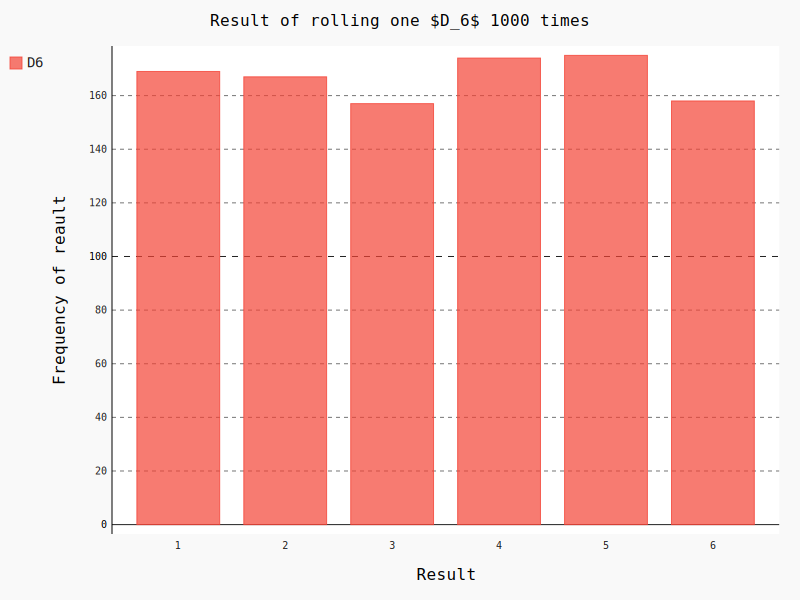

In [5]:
import pygal
# from die import Die

# 创建一个骰子
die = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)

# 分析结果
frequencies = []
for value in range(1,die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
##################
# 对结果进行可视化
hist = pygal.Bar()

hist.title = 'Result of rolling one $D_6$ 1000 times'
hist.x_labels = ['1', '2','3', '4', '5','6']
hist.x_title = 'Result'
hist.y_title = 'Frequency of reault'

hist.add('D6', frequencies)
# hist.render_to_file('text_files/die_visual.svg')

### 同时掷两个骰子

ModuleNotFoundError: No module named 'cairosvg'

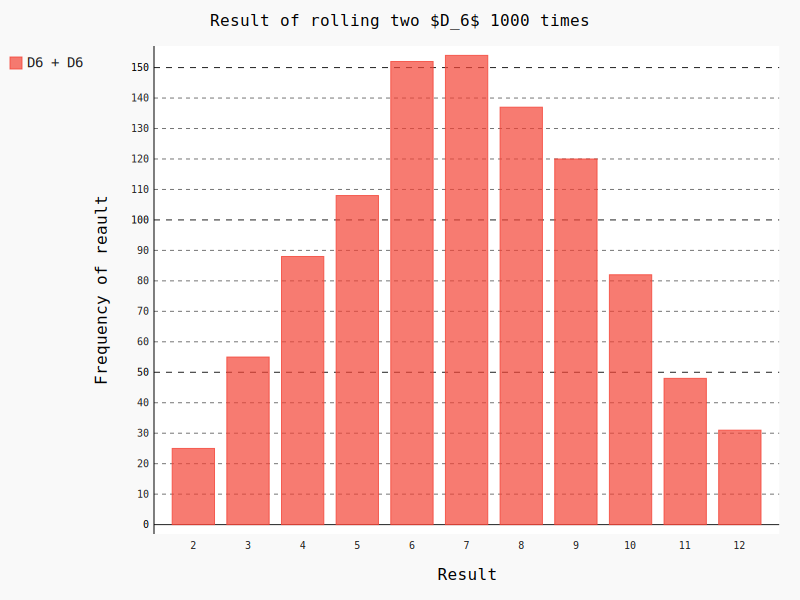

In [9]:
import pygal
# from die import Die

# 创建一个骰子
die_1 = Die()
die_2 = Die()

# 掷骰子,存储在列表中
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll() ############
    results.append(result)

# 分析结果
frequencies = []
max_result = die_1.num_sides + die_2.num_sides ############
for value in range(2,max_result+1):#########
    frequency = results.count(value)
    frequencies.append(frequency)
    

# 对结果进行可视化
hist = pygal.Bar()

hist.title = 'Result of rolling two $D_6$ 1000 times'
hist.x_labels = [ '2','3', '4', '5','6','7','8','9','10','11','12']
hist.x_title = 'Result'
hist.y_title = 'Frequency of reault'

hist.add('D6 + D6', frequencies)
# hist.render_to_file('text_files/die_visual.svg')

# 下载数据

## csv
将数据作为一系列以逗号分隔的值(csv)写入文件,这样的文件成为csv文件

### 分析csv

In [15]:
import csv
filename = 'text_files/sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f) # 将前面的文件作为实参传递
    header_row = next(reader) # 返回文件的下一行
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


In [41]:
import pandas as pd
filename = 'text_files/sitka_weather_07-2014.csv'
df = pd.read_csv(filename)
df.head()

,AKDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2014-7-1,64,56,50,53,51,48,96,83,58,...,10,10,10,7,4,NaN,0.00,7,NaN,337
1,2014-7-2,71,62,55,55,52,46,96,80,51,...,10,9,2,13,5,NaN,0.14,7,Rain,327
2,2014-7-3,64,58,53,55,53,51,97,85,72,...,10,10,8,15,4,NaN,0.01,6,NaN,258
3,2014-7-4,59,56,52,52,51,50,96,88,75,...,10,9,2,9,2,NaN,0.07,7,Rain,255
4,2014-7-5,69,59,50,52,50,46,96,72,49,...,10,10,10,13,5,NaN,0.00,6,NaN,110


### 提取并读取数据

In [18]:
import csv
filename = 'text_files/sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f) # 将前面的文件作为实参传递
    header_row = next(reader) # 返回文件的下一行
    
    # 从文件中获取最高温
    highs =  []
    for row in reader:
        highs.append(row[1])

    print(highs)

['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']


In [42]:
highs = df['Max TemperatureF']
highs

0     64
1     71
2     64
3     59
4     69
5     62
6     61
7     55
8     57
9     61
10    57
11    59
12    57
13    61
14    64
15    61
16    59
17    63
18    60
19    57
20    69
21    63
22    62
23    59
24    57
25    57
26    61
27    59
28    61
29    61
30    66
Name: Max TemperatureF, dtype: int64

转化成数字(pandas可以省略)

In [26]:
import csv
filename = 'text_files/sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f) # 将前面的文件作为实参传递
    header_row = next(reader) # 返回文件的下一行
    
    # 从文件中获取最高温
    highs =  []
    for row in reader:
        high = int(row[1])
        highs.append(high)

    print(highs)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


### 绘制气温图表

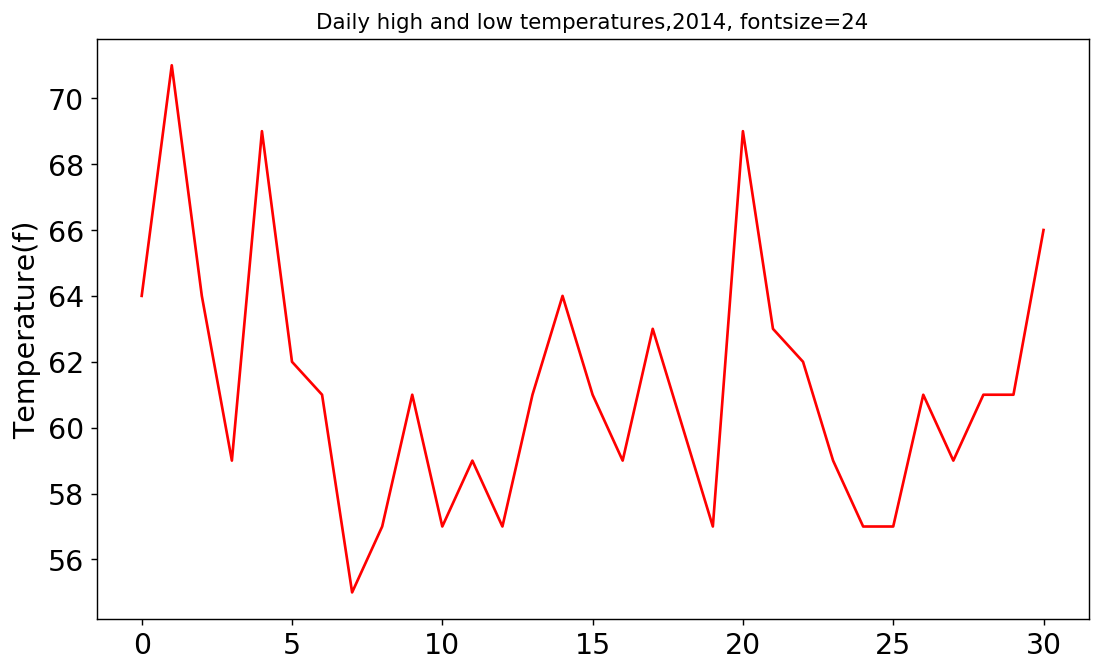

In [30]:
from matplotlib import pyplot as plt

# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10,6))
plt.plot(highs, c='red')


# 设置图像格式
plt.title('Daily high and low temperatures,2014, fontsize=24')
plt.xlabel('',fontsize=16)
plt.ylabel('Temperature(f)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

### 模块datatime

In [33]:
from datetime import datetime
first_date = datetime.strptime('2014-7-1','%Y-%m-%d')
print(first_date)

2014-07-01 00:00:00


In [35]:
help(datetime.strptime)

Help on built-in function strptime:

strptime(...) method of builtins.type instance
    string, format -> new datetime parsed from a string (like time.strptime()).



strptime()字符串作为第一个实参,第二个实参作为设置时间的格式.

实参|含义
-|-
`%A`| 星期名称，Monday
`%B`| 月份名称，January
%m |用数字表示月份，01
%d |用数字表示月份中的一天，01
%Y |四位数的年份，2018
%y |两位数的年份，18
%H |24小时小时数，00~23
%I |12小时小时数，01~12
%p |am/pm
%M |分钟数，00~59
%S |秒数，00~61

### 在图表中添加日期

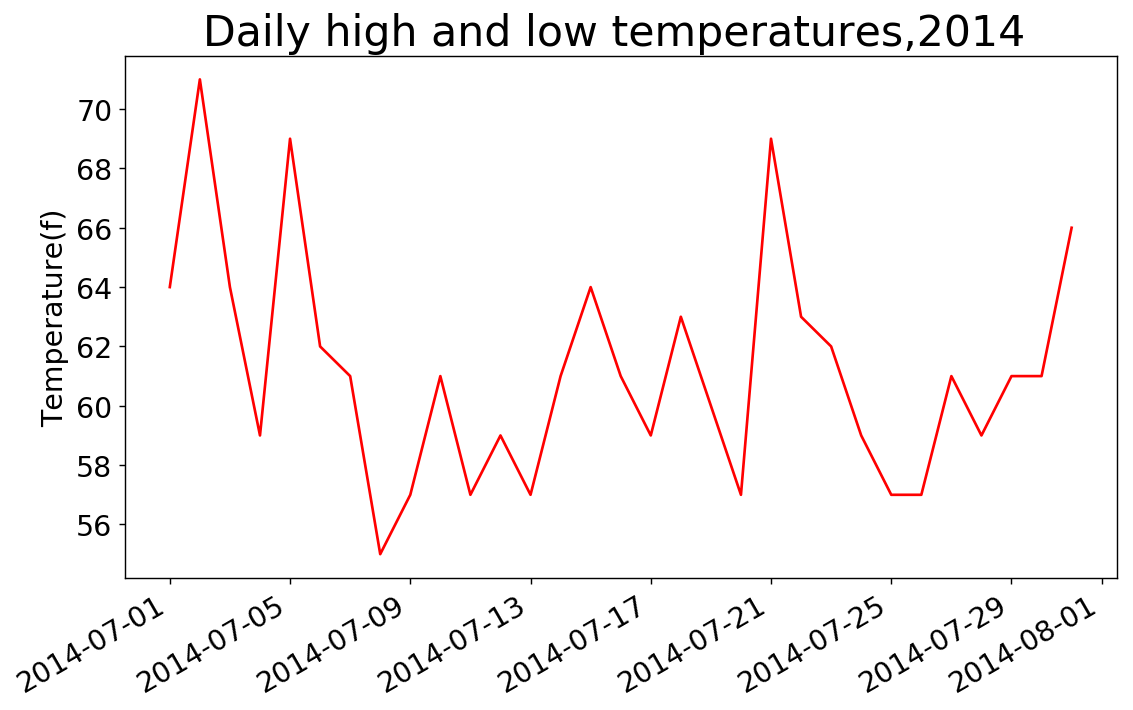

In [17]:
from datetime import datetime
import pandas as pd

from matplotlib import pyplot as plt

def format_time(time):
    return datetime.strptime(time,'%Y-%m-%d')
# 从文件中获取日期和最高气温
filename = 'text_files/sitka_weather_07-2014.csv'
df = pd.read_csv(filename)
dates = list(map(format_time,df.AKDT))
highs = df['Max TemperatureF']


# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10,6))
plt.plot(dates, highs, c='red')



# 设置图像格式
plt.title('Daily high and low temperatures,2014 ', fontsize=24)
plt.xlabel('',fontsize=16)
fig.autofmt_xdate()# 绘制倾斜的日期
plt.ylabel('Temperature(f)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

### 再绘制一个数据系列

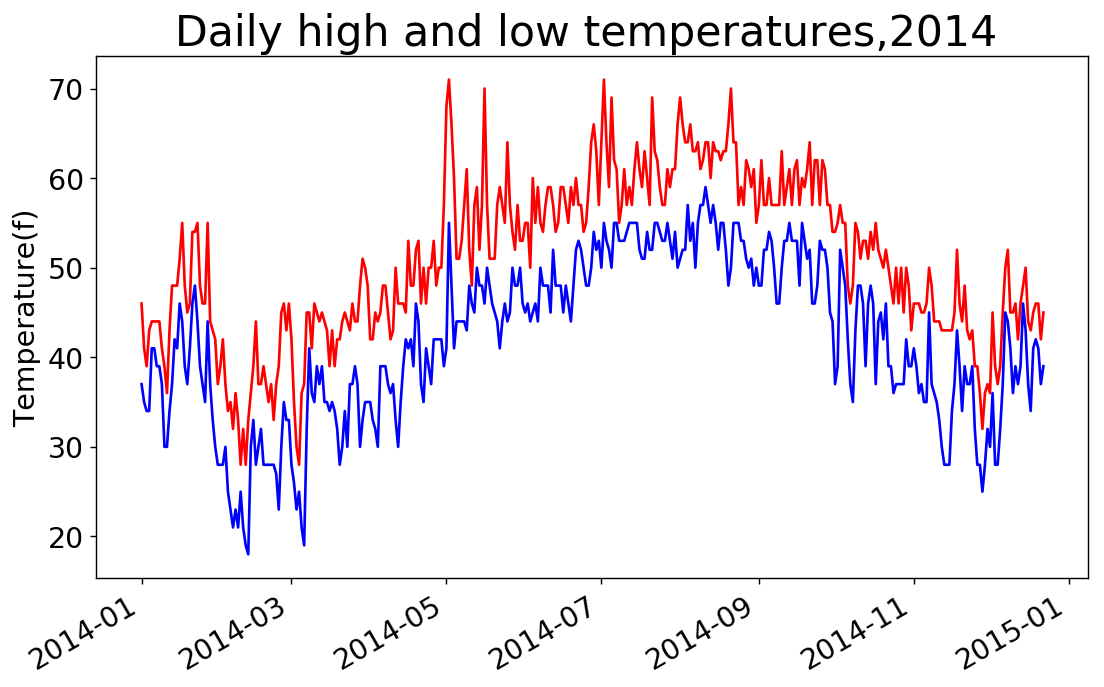

In [22]:
from datetime import datetime
import pandas as pd

from matplotlib import pyplot as plt

def format_time(time):
    return datetime.strptime(time,'%Y-%m-%d')
# 从文件中获取日期和最高气温
filename = 'text_files/sitka_weather_2014.csv'
df = pd.read_csv(filename)
dates = list(map(format_time,df.AKST)) ######### 不知道为什么名字变了
highs = df['Max TemperatureF']
lows = df['Min TemperatureF'] ###################

# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10,6))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue') #################


# 设置图像格式
plt.title('Daily high and low temperatures,2014 ', fontsize=24)
plt.xlabel('',fontsize=16)
fig.autofmt_xdate()# 绘制倾斜的日期
plt.ylabel('Temperature(f)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

### 给图表区域着色

Text(0, 0.5, 'Temperature(f)')

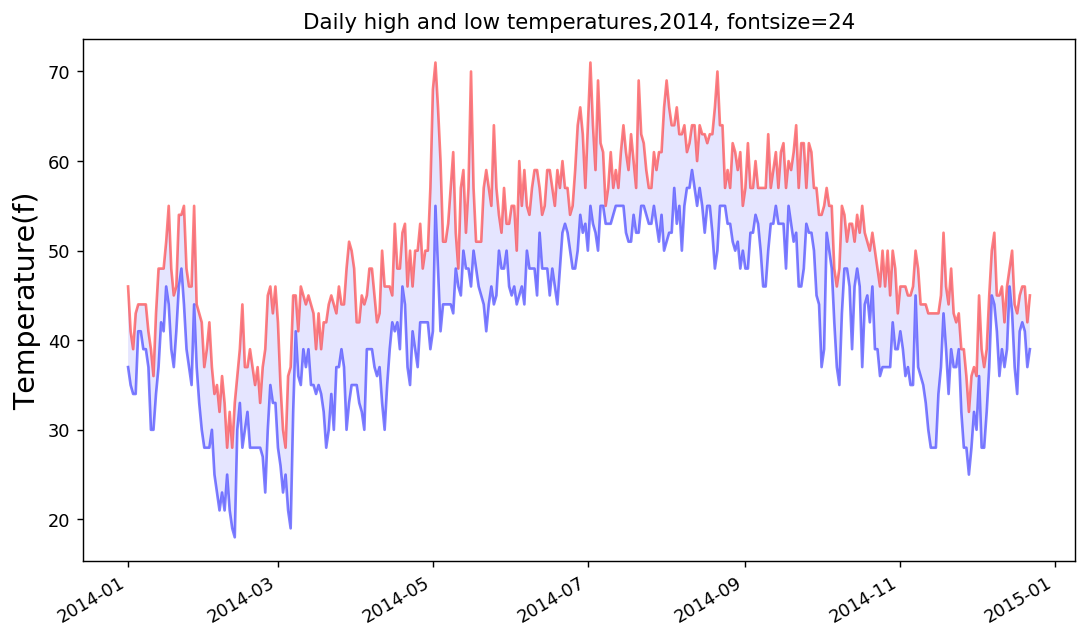

In [24]:
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10,6))
plt.plot(dates,highs, c='red',alpha=0.5)
plt.plot(dates,lows, c='blue', alpha=0.5)
plt.fill_between(dates,highs,lows,facecolor='blue', alpha=0.1)# alpha表示透明度，0完全透明，1完全不透明
                                    # facecolor 为填充区域的颜色
# 设置图像格式
plt.title('Daily high and low temperatures,2014, fontsize=24')
plt.xlabel('',fontsize=16)
fig.autofmt_xdate() # 调用该函数绘制倾斜的日期
plt.ylabel('Temperature(f)', fontsize=16)

### 错误检查

Text(0, 0.5, 'Temperature(f)')

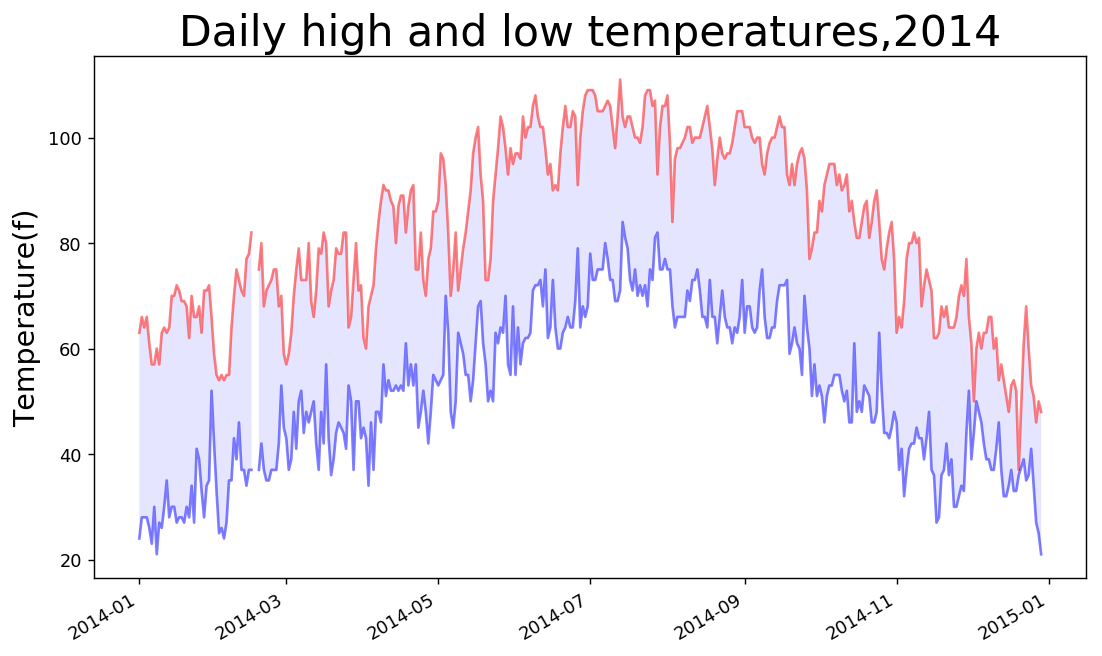

In [6]:
from datetime import datetime
import pandas as pd

from matplotlib import pyplot as plt

def format_time(time):
    return datetime.strptime(time,'%Y-%m-%d')
# 从文件中获取日期和最高气温
filename = 'text_files/death_valley_2014.csv'
df = pd.read_csv(filename)

dates = list(map(format_time,df.PST)) ###### 果然又变了
highs = df['Max TemperatureF']
lows = df['Min TemperatureF'] 


# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10,6))
plt.plot(dates,highs, c='red',alpha=0.5)
plt.plot(dates,lows, c='blue', alpha=0.5)
plt.fill_between(dates,highs,lows,facecolor='blue', alpha=0.1)# alpha表示透明度，0完全透明，1完全不透明
                                    # facecolor 为填充区域的颜色
# 设置图像格式
plt.title('Daily high and low temperatures,2014', fontsize=24)
plt.xlabel('',fontsize=16)
fig.autofmt_xdate() # 调用该函数绘制倾斜的日期
plt.ylabel('Temperature(f)', fontsize=16)


## json格式

In [1]:
import pandas as pd

df = pd.read_json('https://raw.githubusercontent.com/muxuezi/btc/master/btc_close_2017.json')
# 这样都可以?!
df.head()

,close,date,month,week,weekday
0,6928.6492,2017-01-01,1,52,Sunday
1,7070.2554,2017-01-02,1,1,Monday
2,7175.1082,2017-01-03,1,1,Tuesday
3,7835.7615,2017-01-04,1,1,Wednesday
4,6928.7578,2017-01-05,1,1,Thursday


### 下载收盘数据

In [2]:
df.to_json('text_files/btc_close_2017.json')
# pandas 牛B

### 绘制收盘价折线图

ModuleNotFoundError: No module named 'cairosvg'

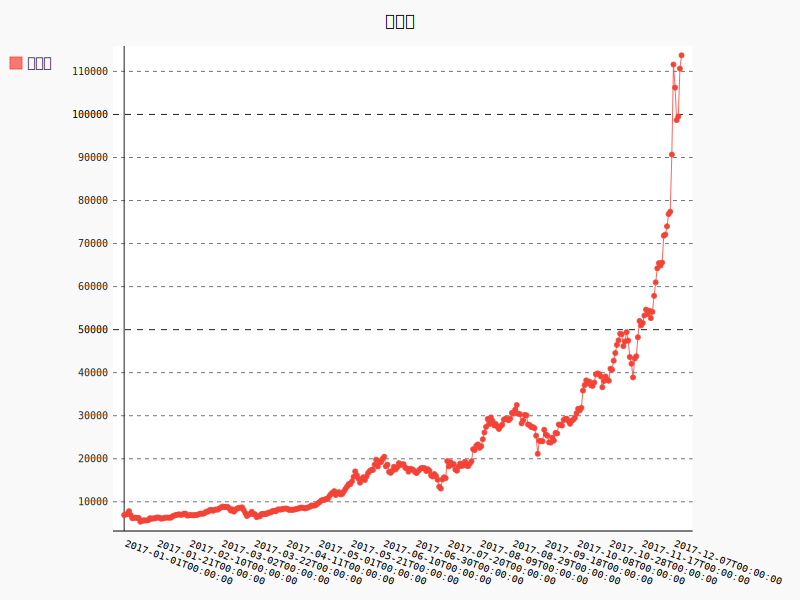

In [4]:
import pygal

dates = list(df.date)
close = list(df.close)
line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
'''
x_label_roation=20 让x轴标签顺时针旋转20度
show_minor_x_labels=False 不用显示所有标签
'''
line_chart.title = '收盘价'
line_chart.x_labels = dates
N = 20 # x坐标隔20天显示一次
line_chart.x_labels_major = dates[::N]
line_chart.add('收盘价', close)
# line_chart.render_to_file('text_files/收盘价折线图.svg')

### 时间序列特征初探

ModuleNotFoundError: No module named 'cairosvg'

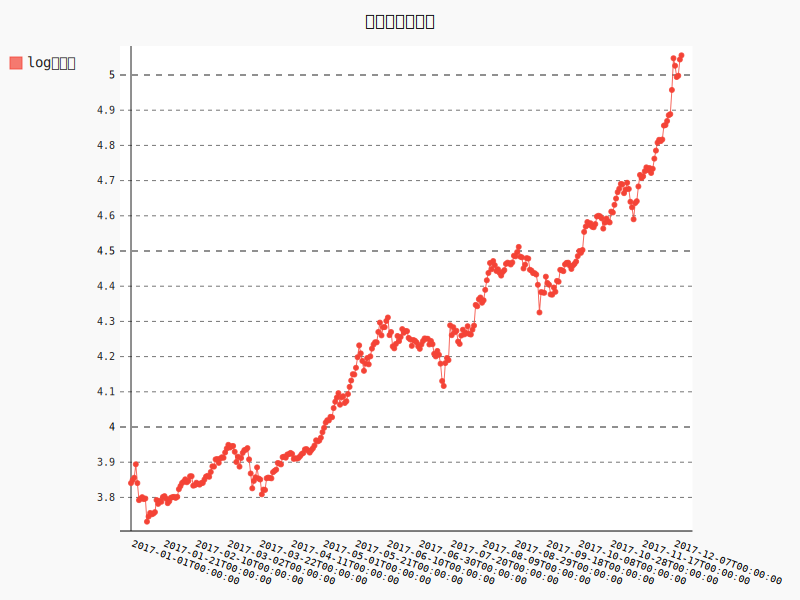

In [5]:
import math ############

dates = list(df.date)
close = list(df.close)
line_chart = pygal.Line(x_label_rotation=20, show_minor_x_labels=False)
'''
x_label_roation=20 让x轴标签顺时针旋转20度
show_minor_x_labels=False 不用显示所有标签
'''
line_chart.title = '收盘价对数变换'
line_chart.x_labels = dates
N = 20
line_chart.x_labels_major = dates[::N]
close_log = [math.log10(_) for _ in close] ###########
line_chart.add('log收盘价', close_log)
# line_chart.render_to_file('text_files/收盘价对数变换折线图.svg')

### 收盘价均值

ModuleNotFoundError: No module named 'cairosvg'

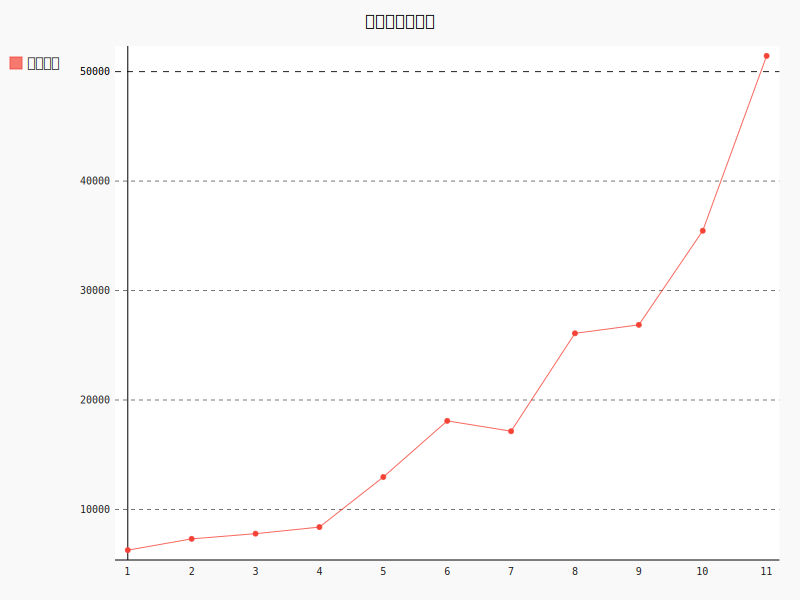

In [35]:
from itertools import groupby

def draw_line(x_data, y_data, title, y_legend):
    xy_map = []
    for x, y in groupby(sorted(zip(x_data, y_data)), key=lambda _ : _[0]):
        y_list = [v for _,v in y]
        xy_map.append([x, sum(y_list) / len(y_list)] )
    x_unique, y_mean = [*zip(*xy_map)]
    line_chart = pygal.Line()
    line_chart.title = title
    line_chart.x_labels = x_unique
    line_chart.add(y_legend, y_mean)
#     line_chart.render_to_file('/text_files'+title+'.svg')
    return line_chart

dates = list(map(str,df.date))
months = df.month
idx_month = dates.index('2017-12-01 00:00:00')
line_chart_month = draw_line(months[:idx_month], close[:idx_month], '收盘价月日均值',
                            '月日均值')
line_chart_month.render_to_file('text_files/收盘价月日均值.svg')
line_chart_month

In [7]:
help(groupby)

Help on class groupby in module itertools:

class groupby(builtins.object)
 |  groupby(iterable, key=None) -> make an iterator that returns consecutive
 |  keys and groups from the iterable.  If the key function is not specified or
 |  is None, the element itself is used for grouping.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



ModuleNotFoundError: No module named 'cairosvg'

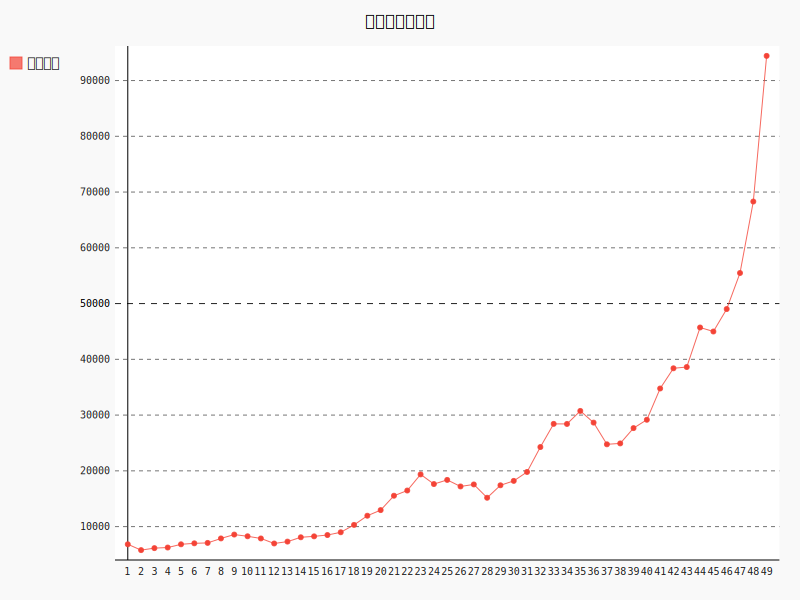

In [38]:
weeks = df.week
idx_week = dates.index('2017-12-11 00:00:00')
line_chart_week = draw_line(weeks[1:idx_week], close[1:idx_week], '收盘价周日均值', '周日均值')
line_chart_week.render_to_file('text_files/收盘价周日均值.svg')
line_chart_week

ModuleNotFoundError: No module named 'cairosvg'

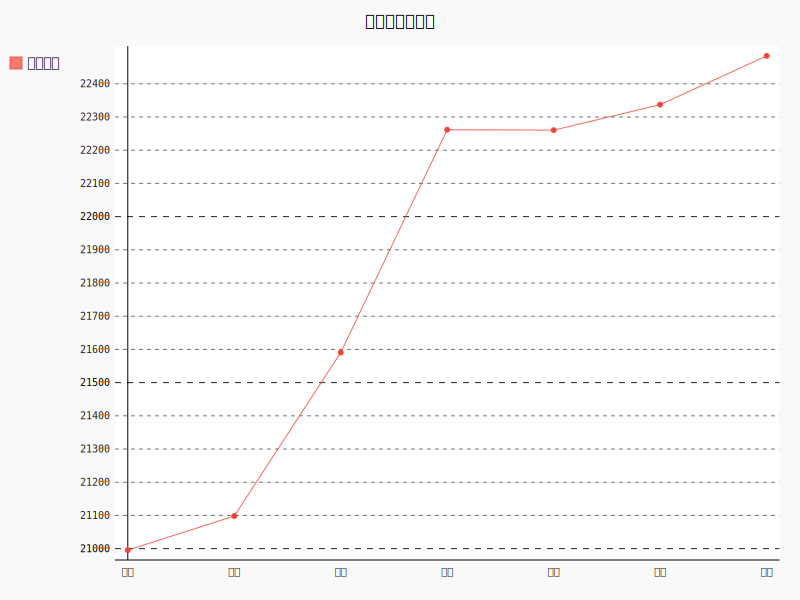

In [33]:
weekdays = df.weekday

wd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_int = [wd.index(w) + 1 for w in weekdays[1:idx_week]]
line_chart_weekday = draw_line(weekdays_int, close[1:idx_week], '收盘价星期均值', '星期均值')
line_chart_weekday.x_labels = ['周一' ,'周二', '周三', '周四', '周五', '周六', '周日']
line_chart_weekday.render_to_file('text_files/收盘价星期均值.svg')
line_chart_weekday

### 绘制收盘价数据仪表盘

In [43]:
with open('text_files/收盘价Dashboard.html', 'w', encoding='utf8') as html_file:
    html_file.write('<html><head><title>收盘价Dashboard</title><metacharset="utf-8"></head><body>\n')
    for svg in[
        '收盘价对数变换折线图', '收盘价星期均值', '收盘价月日均值',
        '收盘价折线图', '收盘价周日均值'
    ]:
        html_file.write('    <object type="image/svg+xml" data= "{0}" height=500></object>\n'.format(svg+'.svg'))
    
    html_file.write('</body></html>')